# hw2

* librosa.feature.fourier_tempogram
* librosa.feature.tempogram
* librosa.beat.tempo
* librosa.beat.beat_track
* librosa.tempo_frequencies
* librosa.fourier_tempo_frequencies

## pip install

In [1]:
!pip3 install librosa
!pip3 install mir_eval
!pip3 install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 3.4 MB/s 
  Created wheel for mir-eval: filename=mir_eval-0.7-py3-none-any.whl size=100721 sha256=28e636def5a809ff317f1954fd9b05c9941a9e8e0fb94355394f203958f4a0c8
  Stored in directory: /root/.cache/pip/wheels/18/5a/46/d2527ff1fd975e1a793375e6ed763bfe4d3ea396b7cdc470eb
Successfully built mir-eval
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.2 MB/s 
     |████████████████████████████████| 51 kB 6.2 MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591955 sha256=bbc2acc2bccc20ca56167e140b7435f7096885101561e711ab3e83b17ac80144
  Stored in directory: /root/.cache/pip/wheels/ad/74/7c/a06473ca8dcb63efb98c1e67667c

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## import library

In [17]:
import glob
import librosa
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from librosa import display
import matplotlib.pyplot as plt
import mir_eval
import pretty_midi

## load dataset

### Ballroom

* load in all 8 genres of Ballroom 
dataset

In [ ]:
ballroom_name = glob.glob("/content/drive/MyDrive/Colab Notebooks/MIR/Ballroom/BallroomData/*")

In [ ]:
ballroom_path = [glob.glob(i+"/*.wav") for i in ballroom_name[2:10]]

In [ ]:
def get_file_name(filepath):
  s = filepath.split('/')[-1].split('.')[0]
  return s

In [ ]:
gernes_name = [i.split('/')[-1] for i in ballroom_name[2:10]]

In [ ]:
files_name = []
for gernes in ballroom_path:
  files_name.append([get_file_name(i) for i in gernes])

In [ ]:
gernes_name

['Jive',
 'Quickstep',
 'Rumba',
 'Samba',
 'Tango',
 'Viennese waltz',
 'Waltz',
 'ChaCha']

In [ ]:
ballroom_path[0][0]

'/content/drive/MyDrive/Colab Notebooks/MIR/Ballroom/BallroomData/Jive/Albums-Cafe_Paradiso-14.wav'

In [ ]:
files_name[0][0]

'Albums-Cafe_Paradiso-14'

In [ ]:
len(files_name)

8

* load beat file

In [ ]:
all_beat_num = []
for gernes in files_name:
  beat_num = []
  for i in gernes:
    n = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIR/Ballroom/BallroomAnnotations-master/"+i+".beats", sep=" ", header=None)
    beat_num.append(n[0])
  all_beat_num.append(beat_num)

In [ ]:
all_beat_num[0][0]

0      0.840
1      1.197
2      1.557
3      1.907
4      2.270
       ...  
79    28.467
80    28.813
81    29.157
82    29.503
83    29.850
Name: 0, Length: 84, dtype: float64

fix bug

In [ ]:
all_beat_num[7][72] = [i.split('\t')[0] for i in all_beat_num[7][72]]

In [ ]:
all_beat_num[7][72] = [float(i) for i in all_beat_num[7][72]]

### JCS

In [23]:
JSC_filepath = glob.glob("/content/drive/MyDrive/Colab Notebooks/MIR/JCS_dataset/audio/*.mp3")

In [15]:
def get_file_name(filepath):
  s = filepath.split('/')[-1].split('.')[0]
  return s

In [33]:
files_name = [get_file_name(i) for i in JSC_filepath]

In [37]:
all_beat_num = []
for i in files_name:
  n = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIR/JCS_dataset/annotations/"+i+"_beats.txt", sep=" ", header=None)
  all_beat_num.append(n[0])

In [42]:
all_beat_num_n = []
for all in all_beat_num:
  all_beat_num_n.append([float(i.split('\t')[0]) for i in all])

### SMC

In [11]:
SMC_wav_path = glob.glob("./SMC_MIREX/SMC_MIREX_Audio/*.wav")

In [5]:
def get_file_name(filepath):
  s = filepath.split('/')[-1].split('.')[0]
  return s

In [13]:
files_name = [get_file_name(i) for i in SMC_wav_path]

In [26]:
SMC_beat_path = [glob.glob("SMC_MIREX/SMC_MIREX_Annotations_05_08_2014/"+i+"*.txt")[0] for i in files_name]

In [35]:
n = pd.read_csv(SMC_beat_path[0], sep=" ", header=None)

In [37]:
all_beat_num = []
for i in SMC_beat_path:
  n = pd.read_csv(i, sep=" ", header=None)
  all_beat_num.append(n[0])

### ASAP

In [45]:
ASAP_name = glob.glob("./ASAP/*")

In [98]:
def get_gerne_name(filepath):
  s = filepath.split('/')[-1]
  return s

In [101]:
l = [get_gerne_name(i) for i in ASAP_name]

In [41]:
ASAP_wav_path = [glob.glob(i+"/wav/*.wav") for i in ASAP_name]

In [46]:
def get_file_name(filepath):
  s = filepath.split('/')[-1].split('.')[0]
  return s

In [47]:
files_name = []
for genres in ASAP_wav_path:
    files_name.append([get_file_name(i) for i in genres])

In [9]:
ASAP_wav_anno_path = []
for name, genres in zip(ASAP_name[0:3], files_name[0:3]):
    ASAP_wav_anno_path.append([glob.glob(name+"/annotation/"+i+"_annotations.txt")[0] for i in genres])

In [10]:
ASAP_wav_path = ASAP_wav_path[0:3]

In [11]:
all_beat_num = []
for gernes in ASAP_wav_anno_path:
  beat_num = []
  for i in gernes:
    n = pd.read_csv(i, sep="\t", header=None)
    beat_num.append(n[0])
  all_beat_num.append(beat_num)

* midi

In [12]:
ASAP_mid_path = [glob.glob(i+"/mid/*.mid") for i in ASAP_name[3:5]]

In [89]:
ASAP_mid_anno_path = []
for name, genres in zip(ASAP_name[3:5], files_name):
    print(name, genres)
    ASAP_mid_anno_path.append([glob.glob(name+"/annotation/"+i+"_annotations.txt")[0] for i in genres])

./ASAP/Prokofiev ['Dossin07', 'Song04', 'Fab13', 'Teo05', 'Kociuban16', 'Colafelice11', 'Guo04', 'Lin06']
./ASAP/Brahms ['Shilyaev03']


In [90]:
all_mid_beat_num = []
for gernes in ASAP_mid_anno_path:
    beat_num = []
    for i in gernes:
        n = pd.read_csv(i, sep="\t", header=None)
        beat_num.append(n[0])
    all_mid_beat_num.append(beat_num)

## Task 2: using dynamic programming for beat tracking


### Q4 (20%)

Using librosa.beat.beat_track to find the beat positions of a song. **Evaluate this beat tracking algorithm on the Ballroom dataset.**

This process can be done with mir_eval.beat. **Please compute the average F-scores of the eight genres in the Ballroom dataset and discuss the results.**

#### code

In [48]:
def f_scores(wavpath, beat):
  y, sr = librosa.load(wavpath)
  tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
  e = librosa.frames_to_time(beats, sr=sr)
  r = np.array(beat)
  f = mir_eval.beat.f_measure(r, e)
  return f

In [49]:
def avg_f_scores(gernepaths, beats):
  length = len(gernepaths)
  f_list = [f_scores(gernepaths[i], beats[i]) for i in range(0, length)]
  ans = sum(f_list)/length
  print(sum(f_list), length, ans)
  return ans

In [ ]:
Fourier_ans_list = []
auto_ans_list = []
for g, b in zip(ballroom_path, all_beat_num):
  Fourier_ans_list.append(avg_f_scores(g, b, True))
  auto_ans_list.append(avg_f_scores(g, b, None))

In [ ]:
lastavg_f = avg_f_scores(ballroom_path[7], all_beat_num[7])

100.22747951184282 111 0.9029502658724577


#### show the results

In [ ]:
results = pd.read_csv("/content/task2_q4_result.txt", header=None, sep=" ")

In [ ]:
df_Q4 = pd.DataFrame(results[2])
df_Q4.columns = ['f score']
df_Q4.index = gernes_name

In [ ]:
df_Q4

,f score
Jive,0.665217
Quickstep,0.621322
Rumba,0.799841
Samba,0.573509
Tango,0.803999
Viennese waltz,0.742469
Waltz,0.648715
ChaCha,0.902950


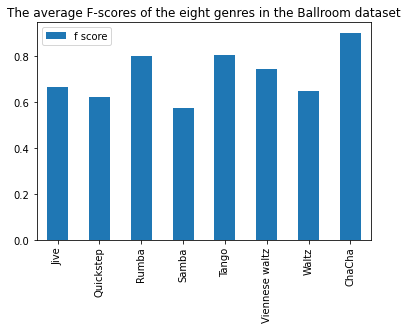

In [ ]:
plot = df_Q4.plot(kind = "bar", title = "The average F-scores of the eight genres in the Ballroom dataset")

In [ ]:
fig = plot.get_figure()
fig.savefig("Q4.png")

### Q5 (20%) 

Also use this algorithm on the **SMC, JCS, and ASAP datasets**. Compare and discuss the results together with the results of the Ballroom dataset. Could you explain the difference in performance?

#### SMC

In [29]:
def f_scores(wavpath, beat):
  y, sr = librosa.load(wavpath)
  tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
  e = librosa.frames_to_time(beats, sr=sr)
  r = np.array(beat)
  f = mir_eval.beat.f_measure(r, e)
  return f

In [41]:
length = len(SMC_wav_path)
f_list = [f_scores(SMC_wav_path[i], all_beat_num[i]) for i in range(0, length)]

In [42]:
Q4_ans_s_df = pd.DataFrame(f_list)
Q4_ans_s_df.index = files_name
Q4_ans_s_df.to_csv("Q4_ans_s_df.csv")

In [44]:
Q4_ans_s = sum(f_list)/length

#### JCS

In [58]:
def f_scores(wavpath, beat):
  y, sr = librosa.load(wavpath)
  tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
  e = librosa.frames_to_time(beats, sr=sr)
  r = np.array(beat)
  f = mir_eval.beat.f_measure(r, e)
  return f

In [59]:
length = len(JSC_filepath)
f_list = [f_scores(JSC_filepath[i], all_beat_num_n[i]) for i in range(0, length)]

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [63]:
Q4_ans_j_df = pd.DataFrame(f_list)
Q4_ans_j_df.index = files_name
Q4_ans_j_df.to_csv("Q4_ans_j_df_j.csv")

In [61]:
Q4_ans_j = sum(f_list)/length

In [62]:
Q4_ans_j

0.6502826555942093

#### ASAP

In [3]:
def f_scores(wavpath, beat, i):
  y, sr = librosa.load(wavpath)
  tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
  e = librosa.frames_to_time(beats, sr=sr)
  r = np.array(beat)
  f = mir_eval.beat.f_measure(r, e)
  print(i, f)
  return f

In [13]:
f_list_all = []
for g, b in zip(ASAP_wav_path, all_beat_num):
    length = len(g)
    print(g)
    f_list_all.append([f_scores(g[i], b[i], i) for i in range(0, length)])

['./ASAP/Glinka/wav/Denisova10M.wav', './ASAP/Glinka/wav/Kleisen07M.wav']
0 0.3233160621761658
1 0.3053254437869823
['./ASAP/Liszt/wav/Zuber07M.wav', './ASAP/Liszt/wav/LuoJ05M.wav', './ASAP/Liszt/wav/LiuY06M.wav', './ASAP/Liszt/wav/ZhangH07M.wav', './ASAP/Liszt/wav/Huang13M.wav', './ASAP/Liszt/wav/Levitsky06M.wav', './ASAP/Liszt/wav/ChernovA04M.wav', './ASAP/Liszt/wav/WangY02M.wav', './ASAP/Liszt/wav/Min03M.wav', './ASAP/Liszt/wav/Gasanov06M.wav', './ASAP/Liszt/wav/LeeE04M.wav', './ASAP/Liszt/wav/LeungM08M.wav', './ASAP/Liszt/wav/Huang14M.wav', './ASAP/Liszt/wav/Woo06M.wav', './ASAP/Liszt/wav/ChenGuang24M.wav', './ASAP/Liszt/wav/Huang18M.wav', './ASAP/Liszt/wav/LeungM12M.wav', './ASAP/Liszt/wav/VuV06M.wav', './ASAP/Liszt/wav/Tario06M.wav', './ASAP/Liszt/wav/Park03M.wav', './ASAP/Liszt/wav/GiacomelliN11M.wav', './ASAP/Liszt/wav/Huang15M.wav', './ASAP/Liszt/wav/Yeletskiy05M.wav', './ASAP/Liszt/wav/WangA07M.wav', './ASAP/Liszt/wav/Huang16M.wav', './ASAP/Liszt/wav/MunA08M.wav', './ASAP/Lis

In [93]:
def f_scores_mid(midpath, beat, i):
  y = pretty_midi.PrettyMIDI(midpath)
  e = y.get_beats()
  r = np.array(beat)
  f = mir_eval.beat.f_measure(r, e)
  print(i, f)
  return f

In [94]:
for g, b in zip(ASAP_mid_path, all_mid_beat_num):
    length = len(g)
    print(g)
    f_list_all.append([f_scores_mid(g[i], b[i], i) for i in range(0, length)])

['./ASAP/Prokofiev/mid/Dossin07.mid', './ASAP/Prokofiev/mid/Song04.mid', './ASAP/Prokofiev/mid/Fab13.mid', './ASAP/Prokofiev/mid/Teo05.mid', './ASAP/Prokofiev/mid/Kociuban16.mid', './ASAP/Prokofiev/mid/Colafelice11.mid', './ASAP/Prokofiev/mid/Guo04.mid', './ASAP/Prokofiev/mid/Lin06.mid']
0 0.2587268993839836
1 0.2558139534883721
2 0.30618892508143325
3 0.23027718550106607
4 0.24217118997912318
5 0.24817518248175185
6 0.26609442060085836
7 0.22529224229543038
['./ASAP/Brahms/mid/Shilyaev03.mid']
0 0.17132867132867136


In [95]:
ans = []
for i in f_list_all:
    ans.append(sum(i)/len(i))

In [96]:
ans

[0.314320752981574,
 0.3677246141080997,
 0.4676805989389658,
 0.25409249985150234,
 0.17132867132867136]

In [106]:
Q5_ans_a_df = pd.DataFrame(ans)
Q5_ans_a_df.index = l
Q5_ans_a_df.columns = ["p score"]
Q5_ans_a_df.to_csv("Q5_ans_a_df.csv")